# Lab 1
### William Olsen

In this lab we will be becoming familiar with git & Github as well as some distributions and their properties.  We will also explore probabilities and how we report them in physics.

In [43]:
# first lets import the required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## A Little Statistics

### Part 1

Recall that in physics we perform a translation and represent probabilities using `sigmas`.  Let us explore this translation using the standard normal distribution as our data source (the standard normal distribution is also used to determine the related sigma value to report for a given probability).

We would like to see what probabilities we get for certain sigma values.  Let's look at multiple values of sigma and see what their related probabilities are.  We will use $\sigma = 0.77, 1.17, 2.93$ as our values - these values are refered to as our _**canidates**_.  As we are getting our canidates from the standard normal distribution they are _equivalent_ to sigma, however generally this is not the case and our canidates will not be equivalent to sigmas.  Looking up these three sigams in the z-table, our expectation is that we will find probabilities of 0.77935, 0.87900, 0.99831 for the sigma values respectively.

Now to determine the probability of a specific value we must integrate the probability density function for the normal distribution.  This integration is equivalent to calculating the value of the cumulative distribution function, or the cdf.  the cumulative distribution function is defined as the probability that the value of the distribution is less than or equal to your canidate: hence it is the area under the curve to the left of the canidate.

In [3]:
# specify the sigma values to try
sigma_1 = 0.77
sigma_2 = 1.17
sigma_3 = 2.93

# calcualate the probabilities associated with each value
prob_sigma_1 = stats.norm.cdf(sigma_1)
prob_sigma_2 = stats.norm.cdf(sigma_2)
prob_sigma_3 = stats.norm.cdf(sigma_3)

print(f'Probability = {prob_sigma_1:.5f} for Sigma = {sigma_1:.2f}')
print(f'Probability = {prob_sigma_2:.5f} for Sigma = {sigma_2:.2f}')
print(f'Probability = {prob_sigma_3:.5f} for Sigma = {sigma_3:.2f}')

Probability = 0.77935 for Sigma = 0.77
Probability = 0.87900 for Sigma = 1.17
Probability = 0.99831 for Sigma = 2.93


Comparing the above values to the expected values from the z-table we see that the cdf calculation is indeed accurate as we got the same values.

Now that we have the probabilities above for each value of sigma we will explore translating this probability back into a sigma.  As we are drawing our data from the normal distribution and we calculate a sigma using the normal distribution we expect that when we calculate the sigma from our probabilities we will recover the original sigma values used previously in order to calculate the probability.

In [4]:
# using the previously calculated probabilities lets determine what sigma was found for that probability
sigma_1_prime = stats.norm.ppf(prob_sigma_1)
sigma_2_prime = stats.norm.ppf(prob_sigma_2)
sigma_3_prime = stats.norm.ppf(prob_sigma_3)

print(f'For Probability = {prob_sigma_1:.5f} got Sigma = {sigma_1_prime:.2f}.  Expected Sigma = {sigma_1:.2f}.')
print(f'For Probability = {prob_sigma_2:.5f} got Sigma = {sigma_2_prime:.2f}.  Expected Sigma = {sigma_2:.2f}.')
print(f'For Probability = {prob_sigma_3:.5f} got Sigma = {sigma_3_prime:.2f}.  Expected Sigma = {sigma_3:.2f}.')

For Probability = 0.77935 got Sigma = 0.77.  Expected Sigma = 0.77.
For Probability = 0.87900 got Sigma = 1.17.  Expected Sigma = 1.17.
For Probability = 0.99831 got Sigma = 2.93.  Expected Sigma = 2.93.


We see above that the conversion from the data source to a probability and then to a sigma is correct and we recover the same value of sigma.  This was our expectation as we originally drew our values from the normal distribution so the same value should be recovered.  As we continue we will no longer be drawing our data from the normal distribution so the sigma value will, generally, not match the _**canidate**_ value as it does here.

Note that if we had used the survival function (defined as 1-cdf) instead of the cummulative distribution function we would have gotten the same values of sigma except they would have been negative.  It is important to note that the normal gaussian distribution is symmetric about zero so the negative values are equivalent to the corresponding postive value.  Thus overall we can consider positive sigmas.

### Part 2

Next we will explore a continous distribution.  Here we will be looking at the **Rayleigh distribution** specifically.  This distribution is a continuous distribution for a collection of non-negative random variables.  Commonly Rayleigh distributions arise in nature when the components of a vector are related to the magnitude of said vector.  Addtionally the Rayleigh distribution is equivalent to the square root of the squared sum of two normal Gaussian random variables, mathematically: $\sqrt{X^2_1 + X^2_2}$ where $X_1, X_2$ are Gaussian normal random variables.

The Rayleigh distribution has the following functions of interest:

$$\text{pdf} = \frac{x}{\sigma^2} e^{-x^2 / (2\sigma^2)} \text{, cdf} = 1 - e^{-x^2 / (2\sigma^2)}$$

Where pdf is the _probability density function_ and cdf is the _cumulative distribution function_ which are both only defined when $x \ge 0$.

We will now make an analytic plot of the function and of 100k random draws from the function to see if the central limit theorem applys when our data is drawn from the Rayleigh distribution.

In [5]:
# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

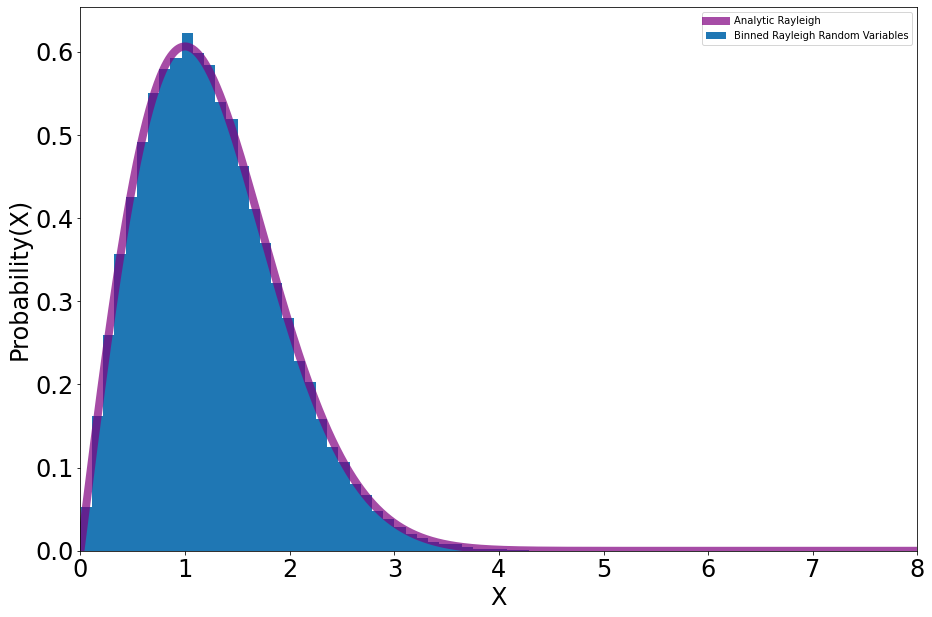

In [66]:
# lets first draw the the 100k points from the distribution
draw = stats.rayleigh.rvs(size=100000)

# now lets group those points into bins and normalize
fig, ax = plt.subplots(1, 1)
ax.hist(draw, bins=50, density=True, label='Binned Rayleigh Random Variables')

# lets plot the analytical function
limits = [0, 8]
x = np.linspace(limits[0], limits[1], 10000)
plt.plot(x, stats.rayleigh.pdf(x), linewidth=8, alpha=0.7, label='Analytic Rayleigh', color='purple')

# adjust information about the graph
plt.tick_params(labelsize=24)
plt.xlim(limits)
plt.xlabel('X', fontdict={'size':24})
plt.ylabel('Probability(X)', fontdict={'size':24})
plt.legend()

plt.show()

From the above we see that our data does indeed follow the central limit theorem and, if we were to draw more data, the histogram would converge closer and closer to the true analytic function.  

Lets look at the same plot but in semi-log space to get a better view of the data and it's behavior at the edge cases.

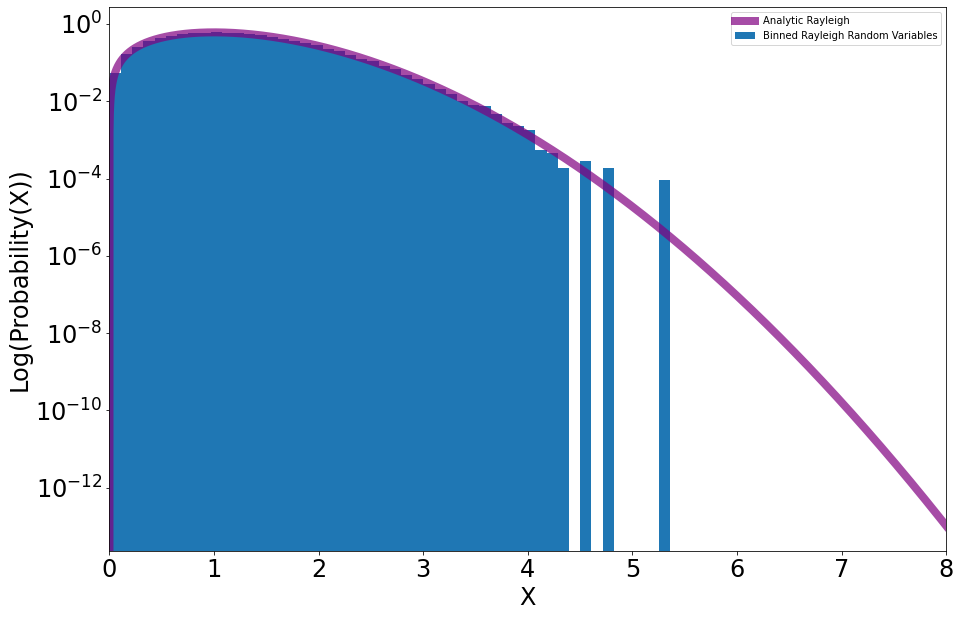

In [67]:
# lets group the previous points into bins and normalize
fig, ax = plt.subplots(1, 1)
ax.hist(draw, bins=50, density=True, label='Binned Rayleigh Random Variables')

# lets plot the analytical function
limits = [0, 8]
x = np.linspace(limits[0], limits[1], 10000)
plt.plot(x, stats.rayleigh.pdf(x), linewidth=8, alpha=0.7, label='Analytic Rayleigh', color='purple')

# adjust information about the graph
plt.yscale('log')
plt.tick_params(labelsize=24)
plt.xlim(limits)
plt.xlabel('X', fontdict={'size':24})
plt.ylabel('Log(Probability(X))', fontdict={'size':24})
plt.legend()

plt.show()

If we were to plot the Guassian distribution on a semi-log plot we would find exactly an upside down parabola.  As can be seen above we do not see a perfect parabola which was as expected because our data was drawn from the Rayleigh distribution rather than from the Guassian.  In the future we will use the semi-log plot to help us determine the true distribution for the data we are observing.

### Part 3

Suppose that we have a signal-free source which governs the background's behavior.  Further suppose that this source follows the Rayleigh distribution.

Now let's suppose that we have observed a signal with value $7$.  

I would like to ask the following question:

> What is the probability that my signal-free source produces a signal that is equally or more signal like than the signal I have observed?

Mathematically, this question can be represented with the following integral:

$$\text{Probability} = \int_{7}^{\infty} \text{pdf}(x) dx = \int_{7}^{\infty} \frac{x}{\sigma^2} e^{-x^2 / (2\sigma^2)} dx$$

Now let us calculate this probability...

In [7]:
# let's calculate the above integral
canidate = 7
canidate_probability = stats.rayleigh.cdf(canidate)
background_canidate_probability = stats.rayleigh.sf(canidate)
print(f'Given caidate = {canidate}, Probability casued by the background = {background_canidate_probability}')

# now lets convert our probability to a sigma
canidate_sigma = stats.norm.ppf(canidate_probability)
print(f'Sigma = {canidate_sigma:.5f}')


Given caidate = 7, Probability casued by the background = 2.289734845645553e-11
Sigma = 6.58400


From the above we see that the probability that the background produces a result that is equal or more signal like than our observed signal of 7 is $6.58400\sigma$.  This is how we will report our probabilities, in $X\sigma$ form where $X$ is some floating point value.

### Part 4

Now let us observe multiple different canidate values and see how the probabilities and sigmas compare in regards to if that canidate could be derrived from the background noise.

In [18]:
# let us define a function to take a canidate and calculate and print the associated probability and sigma.
def determine_sigma(canidate):
    # let's calculate the probability
    canidate_probability = stats.rayleigh.cdf(canidate)
    background_canidate_probability = stats.rayleigh.sf(canidate)

    # now lets convert our probability to a sigma
    canidate_sigma = stats.norm.ppf(canidate_probability)
    print(f'Given caidate = {canidate:0.3f}, Sigma = {canidate_sigma:.5f} where the Probability casued by the background = {background_canidate_probability}')

# test a few values and then describe your obsersations
canidates = np.linspace(1, 7, 15) # look at 15 values
for canidate in canidates:
    determine_sigma(canidate)

Given caidate = 1.000, Sigma = -0.27029 where the Probability casued by the background = 0.6065306597126334
Given caidate = 1.429, Sigma = 0.35726 where the Probability casued by the background = 0.360447788597821
Given caidate = 1.857, Sigma = 0.92200 where the Probability casued by the background = 0.17826397958504792
Given caidate = 2.286, Sigma = 1.45115 where the Probability casued by the background = 0.0733696513683829
Given caidate = 2.714, Sigma = 1.95774 where the Probability casued by the background = 0.025130488985274403
Given caidate = 3.143, Sigma = 2.44897 where the Probability casued by the background = 0.007163364470919217
Given caidate = 3.571, Sigma = 2.92918 where the Probability casued by the background = 0.0016992793655526586
Given caidate = 4.000, Sigma = 3.40119 where the Probability casued by the background = 0.00033546262790251185
Given caidate = 4.429, Sigma = 3.86690 where the Probability casued by the background = 5.5113137010524554e-05
Given caidate = 4.857

From the results above we can see that around a canidate value 4.5 it becomes incredibly unlikely that our canidate resulted from the background noise.  Smaller canidate values however are much more likely to have been due to the backgroud noise.  This result is entirly dependant on the question that we are asking and in this situation we find that a higher canidate value corresponds to a lower probability that the canidate was caused by the background noise.

## Non-continuous distributions

### Part 1

Now that we have explored the continuous Rayleigh distribution lets look at discrete distribution.  A discrete distribution is a distribution where only specific values are valid outputs rather than any value being a value output for the function.  The discrete distribution that we will be exploring is the **binomial distribution**.

A binomial distribution has two parameters that control its behavior, one is **n** which is the number of independent events and the other is **p** which is the probability of a success for an event.  Each single indepentdent event for a binomial distribution is a _bernoulli random variable_ which is simply a random variable with two possible outcomes where one outcome has probability **p** and the other has probability **1-p**.  When $n=1$ the binomial distribution is equivalent to a bernoulli distribution.  Some important functions for the binomial distribution are provided below:

$$\text{pmf(k)} = P(X=k) = \begin{pmatrix}
n \\
k 
\end{pmatrix} p^k (1-p)^{n-k} \text{, with the binomial coefficient defined as}\begin{pmatrix}
n \\
k 
\end{pmatrix} = \frac{n!}{k! (n-k)!}$$

Which is the _probability mass function_.  This calculation is for getting exactly $k$ successes in $n$ independent bernoulli trials with the success probability of success being $p$.  We also have another function:

$$\text{cdf(k)} = P(X\le k) = \sum_{i=0}^{\lfloor k \rfloor} \begin{pmatrix}
n \\
k 
\end{pmatrix} p^k (1-p)^{n-k}$$

This function is the _cumulative distribution function_ which provides a probability that a random variable X will be less than or equal to a provide value.  Thus it provides the probability that you will have k _or less_ successful events.

In practice, the binomial distribution is used to determine the number of times an event is successful.  One example would be how many times I flip heads on a fair coin in 20 flips.  The probability of heads is $\frac{1}{2}$, same for tails, and we expect to see 10 heads and 10 tails after the experiement has completed - obviously there will be some variance involved. 

### Part 2

To understand the behavior of this distribution lets look at some plots of the variables given different parameters for **n** and **p**.

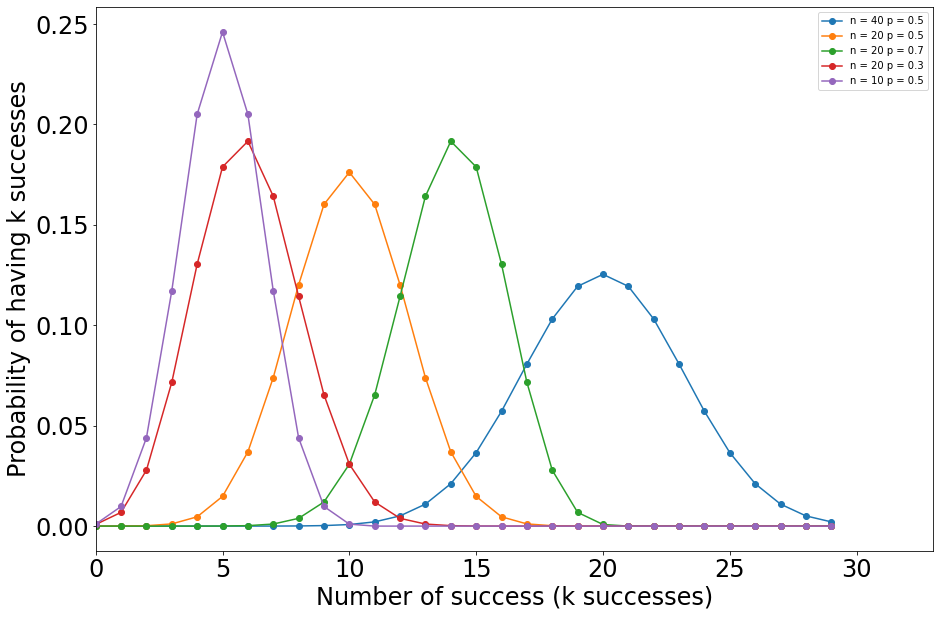

In [108]:
# 
def binomial(n, p):
    x = []
    y = []
    for i in range(0, 30):
        x.append(i)
        y.append(stats.binom.pmf(i, n, p))
    return x, y

# parameters for the plots: [n, p]
parametersList = [(40, 0.5), (20, 0.5), (20, 0.7), (20, 0.3), (10, 0.5)]

fig, ax = plt.subplots(1, 1)

# loop over all of the parameter combinations
for n, p in parametersList:
    # evaluate the function for this parameter combination
    x, y = binomial(n, p)
    
    # plot this parameter combination
    ax.plot(x, y, '-o', label=f'n = {n} p = {p}')


# show the results
limits = [0, 33]
plt.legend()
plt.tick_params(labelsize=24)
plt.xlim(limits)
plt.ylabel("Probability of having k successes", fontdict={'size':24})
plt.xlabel("Number of success (k successes)", fontdict={'size':24})
plt.show()

From the above plot we see that as $n$ gets larger our distribution shifts to the right and as $n$ gets smaller our distribution shifts to the left.  Additionally we see that as our probability $p$ gets smaller the number of successes decreases and as $p$ gets larger the number of successes increases.  Both of these results make intuitive sense as when $n$ gets larger we have more trails which means we have more chances to be successful so our number of successes increased.  Similiarly, as our success rate increases we will succeed more often which results in a greater number of successes.

Additonally notice that when we have a fair probability, the binomial distribution is symmetric about the maximum.  However when the probability is not fair we see that either the right side or left side of the maximum has higher probabilities.  When $p>0.5$ the right side of our function will be heavier while when $p<0.5$ the left side of our function is heavier.

### Part 3

Suppose that we have a signal-free source which governs the background's behavior.  Further suppose that this source follows the Binomial distribution with $n=20$, $p=0.3$. 

Now let's suppose that we have observed a signal with value $13$.  

I would like to ask the following question:

> What is the probability that my signal-free source produces a signal that is equally or more signal like than the signal I have observed?

Mathematically, this question can be represented with the following integral:

$$\text{Probability} = 1 - \text{cdf}(13) = 1 - \sum_{i=0}^{13} \begin{pmatrix}
20 \\
k 
\end{pmatrix} 0.3^k 0.7^{20-k}$$

Now let us calculate this probability...

In [110]:
# let's calculate the above integral
canidate = 13
n = 20
p = 0.3
canidate_probability = stats.binom.cdf(canidate, n, p)
background_canidate_probability = stats.binom.sf(canidate, n, p)
print(f'Given caidate = {canidate}, Probability casued by the background = {background_canidate_probability}')

# now lets convert our probability to a sigma
canidate_sigma = stats.norm.ppf(canidate_probability)
print(f'Sigma = {canidate_sigma:.5f}')


Given caidate = 13, Probability casued by the background = 0.00026104700705946725
Sigma = 3.46916


From the above we see that the probability that the background produces a result that is equal or more signal like than our observed signal of 13 is $3.46916\sigma$.

### Part 4

can switch from discrete to continuous (go from number of photons to an average of number of photons.  why might be helpful?  what is hard about working with discrete stuff?)

### Part 5

Here we have three parameters of interest, $k$, $n$, and $p$.  Both $k$ and $n$ are discrete while $p$ is continous however $p$ is bound such that $0\le p \le 1$.  Here it makes sense that $k$ and $n$ must be discrete as they refer to event counts and the conitation of 'half an event' is invalid and does not make sense.  Converstly, with the parameter $p$, it makes sense for it to be a continous parameter and its bounds make sense.  As the binomial distribution looks at a collection of random variables which have two possible outcomes it does not make sense for one of those outcomes (whichever one is identified as a successful outcome) to have a probability greater than one to occur.  Similarly it does not make sense for the probability of an event occuring to be less than zero.  Finally, between these two extremes a successful event can have any probability imaginable.  If we were to imagine the probability of a coin, we can dictate this probability by changing the weighting of the coin on each face.  The weight exists on the continous distribution and thus the probability will also be a continous quantity.